# Initialization

In [1]:
%matplotlib inline
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.stats import norm

pd.options.display.mpl_style = 'default'

# Data ingestion

In [2]:
# Detour: Generate a small sample file for testing purpose
sampleFile = open('./data/net_traffic_nonull_sample.dat', 'wb')
with open('./data/net_traffic_nonull.dat', 'rb') as trafficFile:
    trafficReader = csv.reader(trafficFile, delimiter=',')
    LIMIT = 1000
    cnt = 0
    for line in trafficReader:
        cnt += 1
        if cnt > LIMIT:
            break
        else:
            sampleFile.write(','.join(line)+'\n')        
sampleFile.close()

In [3]:
# Extract data from file and save into pd.DataFrame
session_df = pd.read_csv(filepath_or_buffer='./data/net_traffic_nonull.dat', sep=',',
                        names=['uid','location','startTime_unix','duration_ms','domainProviders','domainTypes','domains','bytesByDomain','requestsByDomain'])
session_df.index.name = 'sessionID'
session_df

,uid,location,startTime_unix,duration_ms,domainProviders,domainTypes,domains,bytesByDomain,requestsByDomain
sessionID,,,,,,,,,
0,11000752,东中院二区,1411439886390,14799,百度1,搜索导航,baidu.com,2182,2
1,11000752,东中院二区,1411442145178,203010,网易;百度1;谷歌广告1;126网易免费邮箱;谷歌分析;谷歌链接;谷歌搜索2;个性化谷歌广告...,门户;搜索导航;广告;电子邮箱;数码科技;搜索导航;搜索导航;广告;电子邮箱;门户,163.com;baidu.com;doubleclick.net;126.com;goog...,261571;172538;34719;33058;18386;12952;1668;142...,39;33;5;5;2;2;1;1;1;1
2,11000752,东中院三区,1411442842421,0,腾讯微信,即时通讯,qq.com,395,1
3,11000752,学生事务中心-铁生馆,1411443156277,6523,百度1,搜索导航,baidu.com,15887,2
4,11000752,学生宿舍W,1411573440149,55,腾讯微信,即时通讯,qq.com,1150,1
5,11000752,东中院二区,1411956941699,335969,百度1;携程;携程;谷歌搜索2;谷歌分析;腾讯微信;谷歌广告1,搜索导航;旅游;旅游;搜索导航;数码科技;即时通讯;广告,baidu.com;c-ctrip.com;ctrip.com;google.com.hk;...,248455;132759;107146;13408;12705;3533;2260,88;29;13;13;3;3;2
6,11000752,东中院二区,1411957618285,301945,谷歌分析;accu天气,数码科技;生活工具,google-analytics.com;accu-weather.com,26382;20351,4;2
7,11000752,媒体与设计实验室B楼,1413176420667,3230202,百度1;百度图片服务器;风行网络电影;谷歌链接;微软;淘宝图片服务器1;acs86广告;谷歌...,搜索导航;图片服务;视频;搜索导航;数码科技;图片服务;广告;数码科技;广告;音乐;广告;门户,baidu.com;bdimg.com;funshion.com;googlesyndica...,2594141;1069598;201505;201155;114082;113645;15...,279;75;48;6;14;6;6;4;1;4;1;1
8,11000752,媒体与设计实验室B楼,1413180046636,1296008,百度1;微软;谷歌广告1;谷歌广告2;谷歌链接;个性化谷歌广告;千千音乐在线,搜索导航;数码科技;广告;广告;搜索导航;广告;音乐,baidu.com;microsoft.com;doubleclick.net;google...,68580;15576;11197;5689;3780;1679;1308,22;2;1;4;3;2;3


In [4]:
# Create convenient columns
session_df['endTime_unix'] = session_df['startTime_unix'] + session_df['duration_ms']
session_df['startTime_datetime'] = pd.to_datetime(session_df['startTime_unix'], unit='ms')  # convert start time to readible date_time strings
session_df['endTime_datetime'] = pd.to_datetime(session_df['endTime_unix'], unit='ms')
session_df['totalBytes'] = session_df['bytesByDomain'].apply(lambda x: x.split(';')).map(lambda x: sum(map(float, x)))  # sum bytes across domains
session_df['totalRequests'] = session_df['requestsByDomain'].apply(lambda x: x.split(';')).map(lambda x: sum(map(float, x)))  # sum requests across domains
session_df.sort(['startTime_datetime'], ascending=True, inplace=True)  # get it sorted
session_df['interArrivalDuration_datetime'] = session_df.groupby('location')['startTime_datetime'].diff()  # group-wise diff
session_df['interArrivalDuration_ms'] = session_df.groupby('location')['startTime_unix'].diff()  # group-wise diff
session_df

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,uid,location,startTime_unix,duration_ms,domainProviders,domainTypes,domains,bytesByDomain,requestsByDomain,endTime_unix,startTime_datetime,endTime_datetime,totalBytes,totalRequests,interArrivalDuration_datetime,interArrivalDuration_ms
sessionID,,,,,,,,,,,,,,,,
2232784,25161134,药学楼7号楼,1409500804181,143079,小米科技;小米;迅雷网;谷歌搜索2,数码科技;数码科技;视频;搜索导航,xiaomi.net;xiaomi.com;xunlei.com;google.com,18616;946;914;317,22;2;2;1,1409500947260,2014-08-31 16:00:04.181,2014-08-31 16:02:27.260,20793,27,NaT,NaN
4419760,41117355,木兰学院南楼,1409500811160,295551,淘宝图片服务器1;搜狐新闻2;腾讯网;高德地图;uc浏览器1;乐商店;腾讯微信,图片服务;新闻;门户;生活工具;移动软件;移动软件;即时通讯,taobaocdn.com;sohu.com;qq.com;amap.com;uc.cn;l...,48337;17509;15998;8313;4537;1124;1111,5;5;16;3;2;2;1,1409501106711,2014-08-31 16:00:11.160,2014-08-31 16:05:06.711,96929,34,NaT,NaN
5352073,47123971,null,1409500812697,194876,QQ邮箱;腾讯网,电子邮箱;门户,qq.com;qq.com,5924;910,2;1,1409501007573,2014-08-31 16:00:12.697,2014-08-31 16:03:27.573,6834,3,NaT,NaN
8500876,69119214,新体育馆-近沧源路,1409500862493,-217,苹果官网1,网上购物,apple.com,374,1,1409500862276,2014-08-31 16:01:02.493,2014-08-31 16:01:02.276,374,1,NaT,NaN
4008780,37128996,药学楼1号楼,1409500950809,312378,百度1;腾讯网;百度图片服务器;腾讯微信;360安全卫士1,搜索导航;门户;图片服务;即时通讯;移动软件,baidu.com;qq.com;bdimg.com;qq.com;360.cn,74883;7253;2109;735;417,17;6;2;1;2,1409501263187,2014-08-31 16:02:30.809,2014-08-31 16:07:43.187,85397,28,NaT,NaN
6776619,57134493,null,1409501075868,20861,腾讯网;百度1;豌豆夹,门户;搜索导航;移动软件,qq.com;baidu.com;wandoujia.com,2083;1261;622,2;2;1,1409501096729,2014-08-31 16:04:35.868,2014-08-31 16:04:56.729,3966,5,00:04:23.171000,263171
7895851,65135085,药学楼3号楼,1409501122601,104,苹果官网1,网上购物,apple.com,319,1,1409501122705,2014-08-31 16:05:22.601,2014-08-31 16:05:22.705,319,1,NaT,NaN
6442517,55126916,材料A楼,1409501146706,1922,腾讯微信;苹果官网1,即时通讯;网上购物,qq.com;apple.com,8592;341,5;1,1409501148628,2014-08-31 16:05:46.706,2014-08-31 16:05:48.628,8933,6,NaT,NaN
7499545,63012509,机械与动力工程学院B楼－东楼,1409501230571,36962,苹果官网1;友盟1,网上购物;数码科技,apple.com;umeng.com,8174;1155,4;1,1409501267533,2014-08-31 16:07:10.571,2014-08-31 16:07:47.533,9329,5,NaT,NaN


In [5]:
# Anomoly filter
session_df = session_df[session_df['duration_ms']>=0]
session_df = session_df[session_df['location']!='null']

In [6]:
# Re-order columns
session_df = session_df[pd.Index(
      [u'uid', u'location', u'startTime_datetime', u'endTime_datetime', u'duration_ms', u'interArrivalDuration_datetime', u'totalBytes', u'totalRequests',
       u'domainProviders', u'domainTypes', u'domains', u'bytesByDomain',
       u'requestsByDomain', u'startTime_unix', u'endTime_unix', u'interArrivalDuration_ms'],
      dtype='object')]
session_df

,uid,location,startTime_datetime,endTime_datetime,duration_ms,interArrivalDuration_datetime,totalBytes,totalRequests,domainProviders,domainTypes,domains,bytesByDomain,requestsByDomain,startTime_unix,endTime_unix,interArrivalDuration_ms
sessionID,,,,,,,,,,,,,,,,
2232784,25161134,药学楼7号楼,2014-08-31 16:00:04.181,2014-08-31 16:02:27.260,143079,NaT,20793,27,小米科技;小米;迅雷网;谷歌搜索2,数码科技;数码科技;视频;搜索导航,xiaomi.net;xiaomi.com;xunlei.com;google.com,18616;946;914;317,22;2;2;1,1409500804181,1409500947260,NaN
4419760,41117355,木兰学院南楼,2014-08-31 16:00:11.160,2014-08-31 16:05:06.711,295551,NaT,96929,34,淘宝图片服务器1;搜狐新闻2;腾讯网;高德地图;uc浏览器1;乐商店;腾讯微信,图片服务;新闻;门户;生活工具;移动软件;移动软件;即时通讯,taobaocdn.com;sohu.com;qq.com;amap.com;uc.cn;l...,48337;17509;15998;8313;4537;1124;1111,5;5;16;3;2;2;1,1409500811160,1409501106711,NaN
4008780,37128996,药学楼1号楼,2014-08-31 16:02:30.809,2014-08-31 16:07:43.187,312378,NaT,85397,28,百度1;腾讯网;百度图片服务器;腾讯微信;360安全卫士1,搜索导航;门户;图片服务;即时通讯;移动软件,baidu.com;qq.com;bdimg.com;qq.com;360.cn,74883;7253;2109;735;417,17;6;2;1;2,1409500950809,1409501263187,NaN
7895851,65135085,药学楼3号楼,2014-08-31 16:05:22.601,2014-08-31 16:05:22.705,104,NaT,319,1,苹果官网1,网上购物,apple.com,319,1,1409501122601,1409501122705,NaN
6442517,55126916,材料A楼,2014-08-31 16:05:46.706,2014-08-31 16:05:48.628,1922,NaT,8933,6,腾讯微信;苹果官网1,即时通讯;网上购物,qq.com;apple.com,8592;341,5;1,1409501146706,1409501148628,NaN
7499545,63012509,机械与动力工程学院B楼－东楼,2014-08-31 16:07:10.571,2014-08-31 16:07:47.533,36962,NaT,9329,5,苹果官网1;友盟1,网上购物;数码科技,apple.com;umeng.com,8174;1155,4;1,1409501230571,1409501267533,NaN
9014851,73165143,媒体与设计实验室A楼,2014-08-31 16:07:25.191,2014-08-31 16:12:58.593,333402,NaT,31383,34,小米科技;高德地图;腾讯微信;小米;迅雷网;搜狐视频1,数码科技;生活工具;即时通讯;数码科技;视频;视频,xiaomi.net;amap.com;qq.com;xiaomi.com;xunlei.c...,16633;7081;3773;2291;1392;213,17;7;3;3;3;1,1409501245191,1409501578593,NaN
5961765,52074691,工程力学实验中心,2014-08-31 16:07:33.976,2014-08-31 16:07:47.214,13238,NaT,16610,9,腾讯QQ飞车;腾讯微信;高德地图;珠海正点科技;腾讯网;友盟1,游戏;即时通讯;生活工具;移动软件;门户;数码科技,qq.com;qq.com;amap.com;zdworks.com;qq.com;umen...,8862;3543;1309;1182;916;798,1;3;1;2;1;1,1409501253976,1409501267214,NaN
4417428,41112517,药学楼5号楼,2014-08-31 16:08:52.522,2014-08-31 16:11:41.736,169214,NaT,721722,8,新浪图片服务器1;腾讯微信,图片服务;即时通讯,sinaimg.cn;qq.com,720793;929,7;1,1409501332522,1409501501736,NaN


# Aggregation analysis 

In [6]:
# Aggregate by LocName and see total duration, bytes, and requests
grouped_session_df = session_df[['location','duration', 'totalBytes', 'totalRequest']].groupby(['location'])

## Distribution of aggregated column values by location

Emperical Distributions:


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


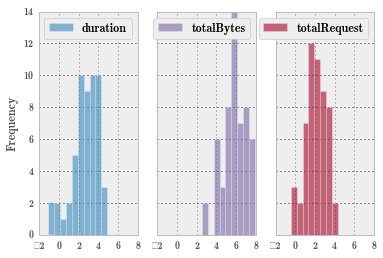

In [7]:
# Visulize emperical distribution (after log) from hist curve
print "Emperical Distributions:"
plt.figure()
sumByLocation = grouped_session_df.sum()
ax = np.log10(sumByLocation).plot(kind='hist', alpha=0.6, bins=15, subplots=True, layout=(1,3), sharex=True, sharey=True)
plt.show()
# ! Varies several OoM ( 6 for duration, 5 for totalBytes, 4 for totalRequests)
# Visualize the rank-size ditributiono

Rank-Size Distributions:
Index([u'第三食堂', u'东上院', u'东下院', u'第二食堂', u'东中院二区', u'媒体与设计实验室B楼',
       u'农学生物学院-附楼三', u'null', u'农学生物学院-附楼二', u'新体育馆-近沧源路', u'菁菁堂', u'学生宿舍W',
       u'工程力学实验中心', u'第一食堂', u'文选医学楼', u'外语楼', u'学生宿舍D', u'陈瑞球北楼', u'逸夫科技楼',
       u'徐汇新上院', u'学生服务中心', u'伍威权堂', u'东中院四区', u'棒球场', u'陈瑞球楼', u'东中院一区',
       u'徐汇体育馆', u'第四食堂', u'校医院北楼', u'建筑馆', u'农学生物学院-附楼一', u'材料A楼', u'药学楼4号楼',
       u'老行政楼', u'东中院三区', u'学生宿舍X', u'药学楼1号楼', u'校医院南楼', u'电信群楼1号楼',
       u'分析测试中心1号楼', u'学生宿舍', u'西南体育馆-南体', u'程及美术馆', u'西中院', u'图书馆四区', u'西下院',
       u'分析测试中心2号楼', u'凯旋门-待定', u'学生事务中心-铁生馆', u'机械与动力工程学院', u'媒体与设计实验室A楼',
       u'光彪楼', u'包玉刚图书馆', u'基建处'],
      dtype='object', name=u'location')
Index([u'第三食堂', u'东下院', u'第二食堂', u'媒体与设计实验室B楼', u'东上院', u'东中院二区',
       u'农学生物学院-附楼三', u'null', u'第一食堂', u'菁菁堂', u'农学生物学院-附楼二', u'文选医学楼',
       u'陈瑞球楼', u'工程力学实验中心', u'外语楼', u'学生宿舍W', u'陈瑞球北楼', u'新体育馆-近沧源路', u'材料A楼',
       u'学生宿舍D', u'徐汇新上院', u'东中院四区', u'分析测试中心1号楼', u'学生服务中心', u'伍威权堂',
       u'农学生

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


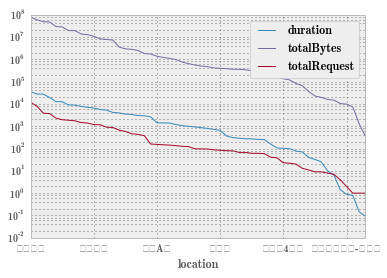

In [8]:
print "Rank-Size Distributions:"
plt.figure()
for i, index in enumerate(['duration', 'totalBytes', 'totalRequest']):
#     plt.subplot(1,3,i+1)
    sorted_copy = sumByLocation[index].copy()
    sorted_copy.sort(ascending=False)
    ax = sorted_copy.plot(x=pd.Series(range(len(sorted_copy.index))),logy=True)
    ax.set_ylim([10**(-2), 10**8])
    print sorted_copy.index
ax.legend(['duration', 'totalBytes', 'totalRequest'])
plt.show()
# ! Q: Follows to Zipf's law？ A: no, Zipf's is a straight line in log-log plot, here is a curvy curve
# ! Looks more like a exponential distribution with super-exp tail

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


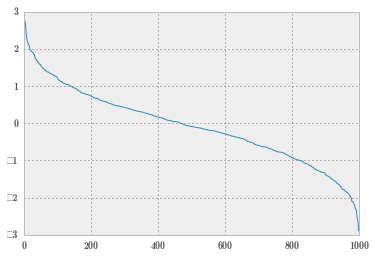

In [9]:
# Detour：What is the ranked plot of a series of normally distributed rvs
norm_sample = pd.Series(data=norm.rvs(size=1000), index=np.arange(1000))
norm_sample.sort(ascending=False)
norm_sample.index = np.arange(1000)
# norm_sample.head()
norm_sample.plot(y=norm_sample.data)
# plt.show()
# side-ways-S shape, not a straight line

## Distribution of session properties 

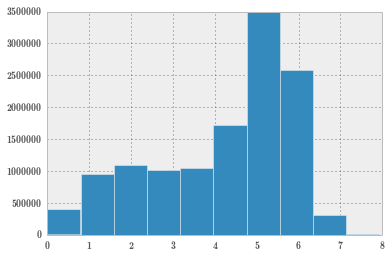

In [38]:
# Distribution of session duration
np.log10(1+session_df['duration_ms']).hist()

In [24]:
# Session stats, e.g. inter-arrival time, session length
des_by_location = session_df[['location','interArrivalDuration_ms','duration_ms']].groupby('location').describe()  # timedelta currently not support groupby aggregate
des_by_location

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


duration 
 interArrival 
 
 
 location 
 
 
 
 
 
 
 
 null 
 count 
 358556.000000 
 358555 
 
 
 mean 
 288.778647 
 0 days 00:00:36.867314 
 
 
 std 
 1007.941099 
 0 days 00:17:02.685610 
 
 
 min 
 -0.896000 
 0 days 00:00:00 
 
 
 25% 
 0.693000 
 0 days 00:00:03.236000 
 
 
 50% 
 42.112500 
 0 days 00:00:09.626000 
 
 
 75% 
 247.096750 
 0 days 00:00:25.978000 
 
 
 max 
 78271.206000 
 4 days 21:13:19.493000 
 
 
 七宝网络中心 
 count 
 245.000000 
 244 
 
 
 mean 
 504.679216 
 0 days 08:34:45.176266 
 
 
 std 
 1044.247687 
 1 days 02:01:25.450591 
 
 
 min 
 -0.254000 
 0 days 00:00:10.627000 
 
 
 25% 
 6.706000 
 0 days 00:13:16.315500 
 
 
 50% 
 119.104000 
 0 days 00:21:26.368500 
 
 
 75% 
 494.155000 
 0 days 01:30:33.504250 
 
 
 max 
 8474.187000 
 7 days 20:25:05.933000 
 
 
 东上院 
 count 
 766678.000000 
 766677 
 
 
 mean 
 420.724281 
 0 days 00:00:16.826088 
 
 
 std 
 870.191428 
 0 days 00:13:03.290160 
 
 
 min 
 -0.897000 
 0 days 00:00:00 
 
 
 25% 
 1.335000 
 0 days 00:00:00.926000 
 
 
 50% 
 119.738500 
 0 days 00:00:03.033000 
 
 
 75% 
 471.648750 
 0 days 00:00:08.447000 
 
 
 max 
 40080.329000 
 5 days 00:13:58.666000 
 
 
 东下院 
 count 
 870668.000000 
 870667 
 
 
 mean 
 306.001082 
 0 days 00:00:15.180743 
 
 
 std 
 620.671200 
 0 days 00:12:22.268804 
 
 
 min 
 -0.894000 
 0 days 00:00:00 
 
 
 25% 
 0.965000 
 0 days 00:00:00.872000 
 
 
 50% 
 70.578000 
 0 days 00:00:02.750000 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 逸夫科技楼 
 std 
 790.878954 
 0 days 00:26:31.071636 
 
 
 min 
 -0.896000 
 0 days 00:00:00 
 
 
 25% 
 0.888000 
 0 days 00:00:06.399000 
 
 
 50% 
 45.908000 
 0 days 00:00:18.684000 
 
 
 75% 
 278.403750 
 0 days 00:00:48.493500 
 
 
 max 
 35964.418000 
 5 days 00:58:00.581000 
 
 
 陈瑞球北楼 
 count 
 417893.000000 
 417892 
 
 
 mean 
 291.998838 
 0 days 00:00:31.558044 
 
 
 std 
 614.683287 
 0 days 00:19:06.518248 
 
 
 min 
 -0.894000 
 0 days 00:00:00 
 
 
 25% 
 0.449000 
 0 days 00:00:01.648000 
 
 
 50% 
 54.876000 
 0 days 00:00:05.106000 
 
 
 75% 
 320.525000 
 0 days 00:00:14.529250 
 
 
 max 
 24344.270000 
 5 days 01:13:21.461000 
 
 
 陈瑞球南楼 
 count 
 128771.000000 
 128770 
 
 
 mean 
 276.737283 
 0 days 00:01:42.354109 
 
 
 std 
 888.777493 
 0 days 00:35:59.169218 
 
 
 min 
 -0.891000 
 0 days 00:00:00 
 
 
 25% 
 0.225500 
 0 days 00:00:04.183000 
 
 
 50% 
 13.348000 
 0 days 00:00:14.407000 
 
 
 75% 
 196.640000 
 0 days 00:00:47.574250 
 
 
 max 
 45772.393000 
 5 days 09:47:11.420000 
 
 
 陈瑞球楼 
 count 
 84990.000000 
 84989 
 
 
 mean 
 109.621319 
 0 days 00:02:35.289042 
 
 
 std 
 182.076447 
 0 days 00:42:09.455588 
 
 
 min 
 -0.894000 
 0 days 00:00:00 
 
 
 25% 
 0.868000 
 0 days 00:00:13.980000 
 
 
 50% 
 29.077000 
 0 days 00:00:38.596000 
 
 
 75% 
 141.488750 
 0 days 00:01:35.496000 
 
 
 max 
 6873.095000 
 5 days 00:48:49.414000 
 
 
 
 784 rows × 2 columns

In [65]:
des_by_location.loc['第三食堂']

,duration,interArrival
count,357211.000000,357210
mean,202.282113,0 days 00:00:31.023109
std,372.862283,0 days 00:18:44.811424
min,-0.894000,0 days 00:00:00
25%,1.735000,0 days 00:00:01.856000
50%,60.097000,0 days 00:00:05.364000
75%,262.991000,0 days 00:00:15.029000
max,19525.917000,5 days 06:41:32.258000


In [59]:
des_by_location.index

MultiIndex(levels=[[u'null', u'七宝网络中心', u'东上院', u'东下院', u'东中院一区', u'东中院三区', u'东中院二区', u'东中院四区', u'中意能源楼', u'人文楼', u'伍威权堂', u'光彪楼', u'农学生物学院-附楼一', u'农学生物学院-附楼三', u'农学生物学院-附楼二', u'凯原法学院', u'凯旋门-待定', u'分析测试中心1号楼', u'分析测试中心2号楼', u'分析测试中心3号楼', u'包玉刚图书馆', u'图书馆', u'图书馆四区', u'基建处', u'外语楼', u'媒体与设计实验室A楼', u'媒体与设计实验室B楼', u'学生事务中心-铁生馆', u'学生宿舍', u'学生宿舍D', u'学生宿舍W', u'学生宿舍X', u'学生服务中心', u'工程力学实验中心', u'建筑馆', u'徐汇中院', u'徐汇体育馆', u'徐汇保卫处', u'徐汇图书馆', u'徐汇小白楼', u'徐汇工程馆', u'徐汇总办公厅', u'徐汇新上院', u'徐汇新中院', u'徐汇新建楼', u'徐汇校医院', u'徐汇法学楼', u'徐汇浩然大厦', u'文选医学楼', u'新体育馆-近沧源路', u'木兰学院北楼', u'木兰学院南楼', u'机械与动力工程学院', u'机械与动力工程学院A楼－主楼', u'机械与动力工程学院A楼－附楼', u'机械与动力工程学院B楼－东楼', u'机械与动力工程学院B楼－北楼', u'机械与动力工程学院B楼－南楼', u'机械与动力工程学院C楼－附楼', u'材料A楼', u'校医院北楼', u'校医院南楼', u'棒球场', u'法华10号楼', u'法华1号楼', u'法华3号楼', u'法华4号楼', u'法华北楼', u'法华南楼', u'法华安泰综合楼', u'燃料电池研究所', u'电信群楼1号楼', u'电信群楼3号楼', u'电信群楼5号楼', u'电话总机房', u'留园', u'程及美术馆', u'第一食堂', u'第三食堂', u'第二食堂', u'第四食堂', u'老行政楼', u'能源材料', u'药学楼1号楼', u'药学楼2号楼', u'药学楼3号楼', u'药学楼4号楼', u'药学楼5号楼', u'药

# Time-series

## Session arrival and inter-arrival time ts

(0, 10000)

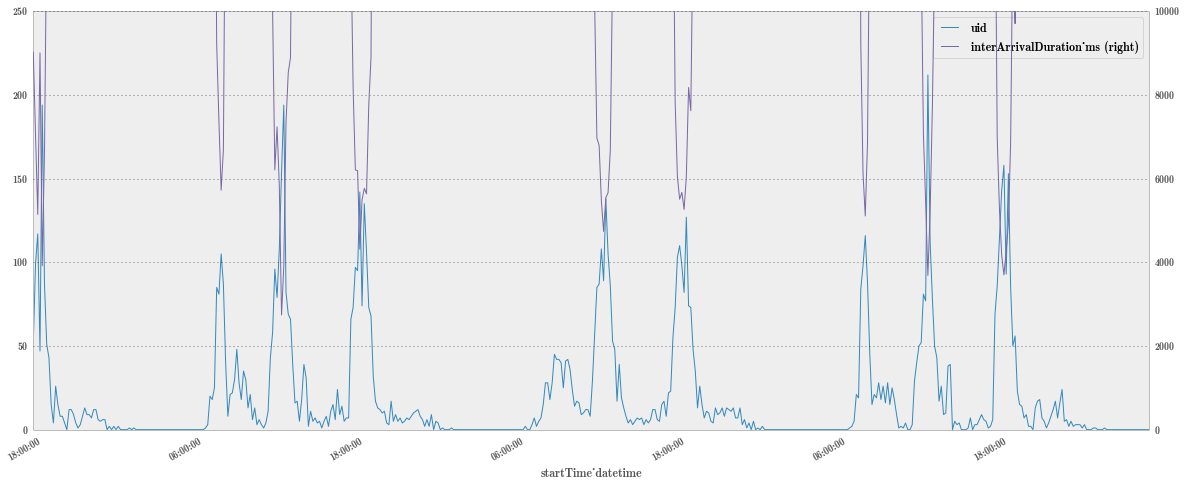

In [77]:
# choose a location and a time range, plot the time series of mean session count and inter arrival time
location_str, freq, time_range = '第三食堂', '10Min', range(0, 500)
cnt = session_df[session_df['location']==location_str][['uid','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong')
iad = session_df[session_df['location']==location_str][['interArrivalDuration_ms','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).agg(np.mean).tz_localize('UTC').tz_convert('Asia/Hong_Kong')
fig, ax = plt.subplots(figsize=(20, 8.3))  # wider figure 
cnt.iloc[time_range].plot(ax=ax)
iad.iloc[time_range].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim((0, 10*1000))  # 10*1000 = 10 sec

(0, 10000)

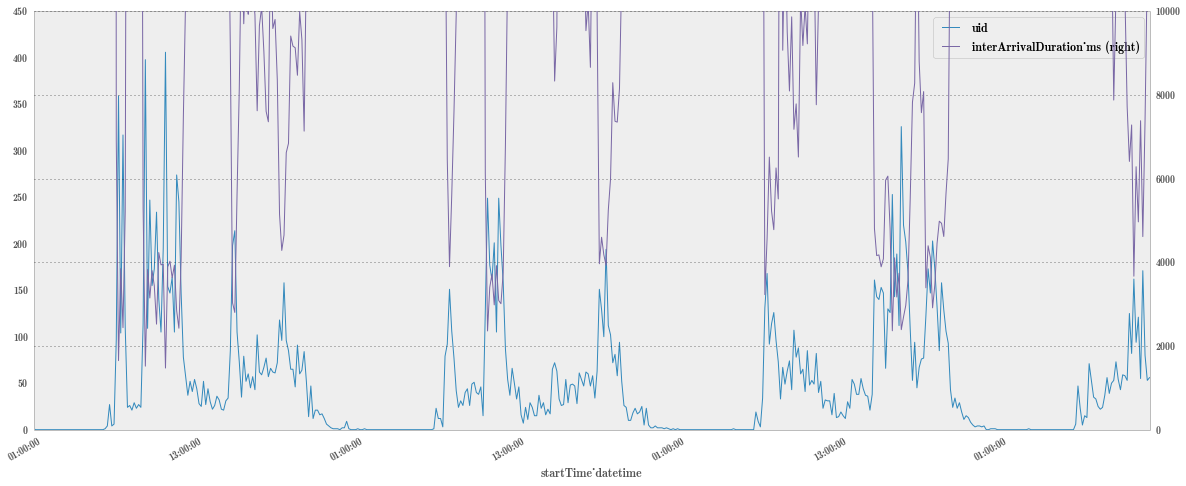

In [73]:
# choose a location and a time range, plot the time series of mean session count and inter arrival time
location_str, freq, time_range = '东下院', '10Min', range(0, 500)
cnt = session_df[session_df['location']==location_str][['uid','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong')
iad = session_df[session_df['location']==location_str][['interArrivalDuration_ms','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).agg(np.mean).tz_localize('UTC').tz_convert('Asia/Hong_Kong')
fig, ax = plt.subplots(figsize=(20, 8.3))  # wider figure 
cnt.iloc[time_range].plot(ax=ax)
iad.iloc[time_range].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim((0, 10*1000))  # 10*1000 = 10 sec

(0, 200000)

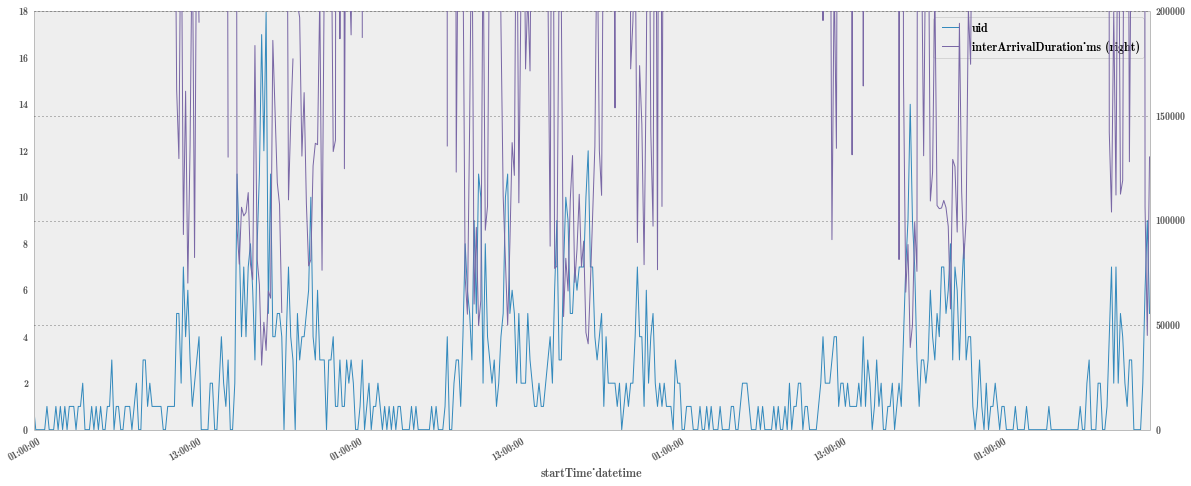

In [75]:
# choose a location and a time range, plot the time series of mean session count and inter arrival time
location_str, freq, time_range = '媒体与设计实验室B楼', '10Min', range(0, 500)
cnt = session_df[session_df['location']==location_str][['uid','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong')
iad = session_df[session_df['location']==location_str][['interArrivalDuration_ms','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).agg(np.mean).tz_localize('UTC').tz_convert('Asia/Hong_Kong')
fig, ax = plt.subplots(figsize=(20, 8.3))  # wider figure 
cnt.iloc[time_range].plot(ax=ax)
iad.iloc[time_range].plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylim((0, 200*1000))  # 10*1000 = 10 sec

(-200000, 200000)

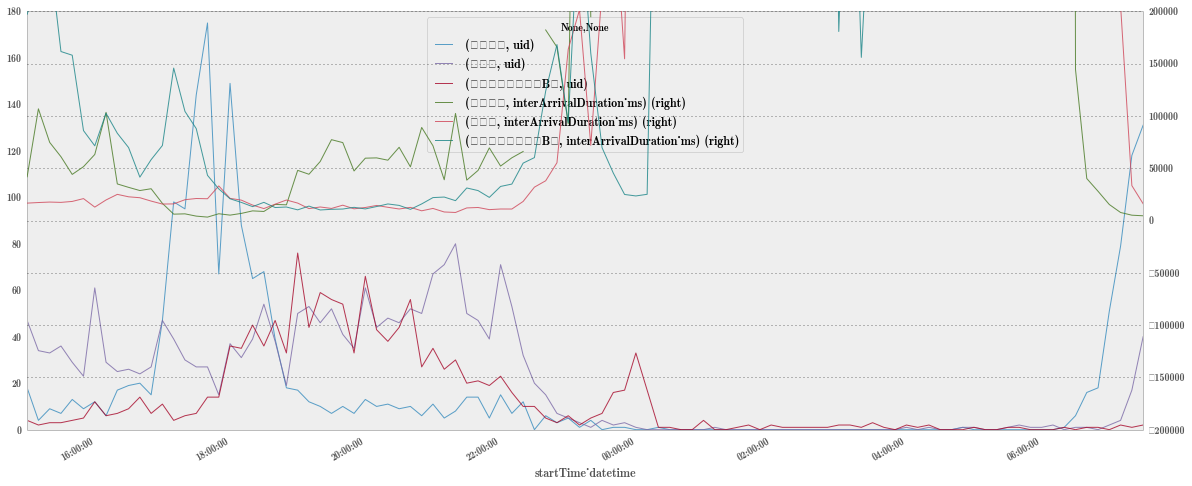

In [104]:
loc_strs, freq, time_range = ['第三食堂', '东上院', '媒体与设计实验室B楼'] , '10Min', range(7000, 7100)
cnt = []
iad = []
for i, loc_str in enumerate(loc_strs):
    cnt.append(session_df[session_df['location']==loc_str][['uid','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong'))
    iad.append(session_df[session_df['location']==loc_str][['interArrivalDuration_ms','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).agg(np.mean).tz_localize('UTC').tz_convert('Asia/Hong_Kong'))
fig, ax = plt.subplots(figsize=(20, 8.3))  # wider figure 
pd.concat(cnt, axis=1, keys=loc_strs).iloc[time_range].plot(ax=ax, sharex=True, alpha=0.8)
pd.concat(iad, axis=1, keys=loc_strs).iloc[time_range].plot(ax=ax, sharex=True, alpha=0.8, secondary_y=True)
ax.right_ax.set_ylim((-200*1000, 200*1000))  # 10*1000 = 10 sec

In [34]:
loc_str = '第三食堂'
freq = '1S'
in_cnt = session_df[session_df['location']==loc_str][['uid','startTime_datetime']].groupby(pd.Grouper(key='startTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong')
out_cnt = session_df[session_df['location']==loc_str][['uid','endTime_datetime']].groupby(pd.Grouper(key='endTime_datetime', freq=freq)).count().tz_localize('UTC').tz_convert('Asia/Hong_Kong')
cnts = pd.concat([in_cnt, out_cnt], axis=1, keys=['in', 'out'])

In [35]:
cnts['diff'] = cnts['in'] - cnts['out']

In [36]:
cnts['cumsum'] = cnts['diff'].cumsum()

array([<matplotlib.axes.AxesSubplot object at 0x7f999c648810>,
       <matplotlib.axes.AxesSubplot object at 0x7f999c5608d0>], dtype=object)

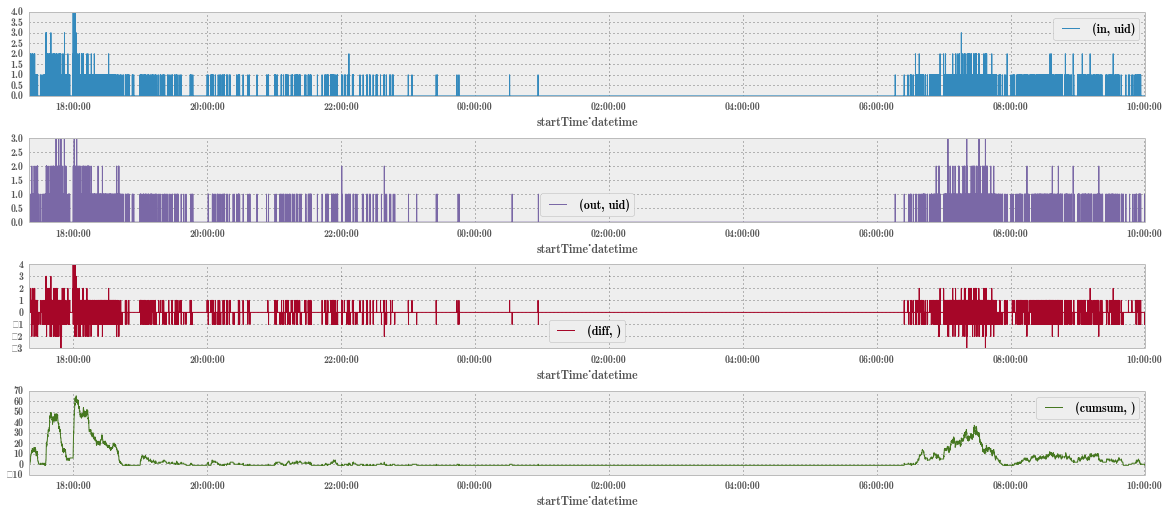

In [37]:
fig, ax = plt.subplots(figsize=(20, 8.3))  # wider figure 
cnts.iloc[0:60000].plot(ax=ax, subplots=True)